In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# import matplotlib.pyplot as plt

# plt.rc('font', family='NanumBarunGothic') 

In [2]:
import pandas as pd
import numpy as np
import folium
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# **Load Data(PM10)**

In [4]:
path = '/content/gdrive/My Drive/airdata/'

In [5]:
data = pd.read_csv(path+'2015-2020.csv')
data.drop(data.columns[0],inplace=True,axis=1)
data

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망
0,강원 강릉시,632132,옥천동,2015040101,0.0030,0.5,0.052,0.0050,57.0,41.0,강원 강릉시 옥천동 327-2(옥천동주민센터),NaN
1,강원 강릉시,632132,옥천동,2015040102,0.0030,0.5,0.060,0.0040,56.0,43.0,강원 강릉시 옥천동 327-2(옥천동주민센터),NaN
2,강원 강릉시,632132,옥천동,2015040103,0.0030,0.5,0.057,0.0040,72.0,54.0,강원 강릉시 옥천동 327-2(옥천동주민센터),NaN
3,강원 강릉시,632132,옥천동,2015040104,0.0030,0.5,0.049,0.0040,80.0,48.0,강원 강릉시 옥천동 327-2(옥천동주민센터),NaN
4,강원 강릉시,632132,옥천동,2015040105,0.0030,0.5,0.045,0.0040,62.0,30.0,강원 강릉시 옥천동 327-2(옥천동주민센터),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20383216,인천 옹진군,831495,울도,2020093020,0.0008,0.3,0.038,0.0017,18.0,NaN,인천 옹진군 덕적면 울도리 85번지,국가배경농도
20383217,인천 옹진군,831495,울도,2020093021,0.0008,0.3,0.036,0.0020,16.0,NaN,인천 옹진군 덕적면 울도리 85번지,국가배경농도
20383218,인천 옹진군,831495,울도,2020093022,0.0008,0.3,0.036,0.0018,17.0,NaN,인천 옹진군 덕적면 울도리 85번지,국가배경농도
20383219,인천 옹진군,831495,울도,2020093023,0.0008,0.3,0.036,0.0018,20.0,NaN,인천 옹진군 덕적면 울도리 85번지,국가배경농도


**서울 데이터만 추출**

In [6]:
data2 = data[data['지역'].str.contains('서울')]
data2

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망
404040,서울,111121,중구,2015040101,0.004,0.9,0.007,0.050,38.0,28.0,서울 중구 덕수궁길 15,NaN
404041,서울,111121,중구,2015040102,0.004,0.8,0.021,0.032,29.0,NaN,서울 중구 덕수궁길 15,NaN
404042,서울,111121,중구,2015040103,0.004,0.7,0.022,0.027,31.0,NaN,서울 중구 덕수궁길 15,NaN
404043,서울,111121,중구,2015040104,0.004,0.7,0.023,0.021,28.0,26.0,서울 중구 덕수궁길 15,NaN
404044,서울,111121,중구,2015040105,0.004,0.7,0.019,0.026,22.0,19.0,서울 중구 덕수궁길 15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20020836,서울 노원구,111312,화랑로,2020093020,NaN,NaN,NaN,NaN,NaN,NaN,서울 노원구 화랑로 429,도로변대기
20020837,서울 노원구,111312,화랑로,2020093021,NaN,NaN,NaN,NaN,NaN,NaN,서울 노원구 화랑로 429,도로변대기
20020838,서울 노원구,111312,화랑로,2020093022,NaN,NaN,NaN,NaN,NaN,NaN,서울 노원구 화랑로 429,도로변대기
20020839,서울 노원구,111312,화랑로,2020093023,NaN,NaN,NaN,NaN,NaN,NaN,서울 노원구 화랑로 429,도로변대기


In [7]:
data2 = data2.sort_values(['측정소코드','측정일시'],ignore_index=True)
data2

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망
0,서울,111121,중구,2015010101,0.006,0.6,0.022,0.011,44.0,7.0,서울 중구 덕수궁길 15,NaN
1,서울,111121,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0,서울 중구 덕수궁길 15,NaN
2,서울,111121,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0,서울 중구 덕수궁길 15,NaN
3,서울,111121,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0,서울 중구 덕수궁길 15,NaN
4,서울,111121,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0,서울 중구 덕수궁길 15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2070715,서울 노원구,111312,화랑로,2020123120,0.003,0.4,0.005,0.036,32.0,13.0,서울 노원구 화랑로 429,도로변대기
2070716,서울 노원구,111312,화랑로,2020123121,0.003,0.4,0.006,0.035,31.0,14.0,서울 노원구 화랑로 429,도로변대기
2070717,서울 노원구,111312,화랑로,2020123122,0.003,0.4,0.010,0.029,31.0,14.0,서울 노원구 화랑로 429,도로변대기
2070718,서울 노원구,111312,화랑로,2020123123,0.003,0.4,0.013,0.026,32.0,16.0,서울 노원구 화랑로 429,도로변대기


**월 컬럼 생성**

In [8]:
data2['측정일시']=data2['측정일시'].astype('str')
data2['월'] = data2['측정일시'].str[4:6]
data2

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망,월
0,서울,111121,중구,2015010101,0.006,0.6,0.022,0.011,44.0,7.0,서울 중구 덕수궁길 15,NaN,01
1,서울,111121,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0,서울 중구 덕수궁길 15,NaN,01
2,서울,111121,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0,서울 중구 덕수궁길 15,NaN,01
3,서울,111121,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0,서울 중구 덕수궁길 15,NaN,01
4,서울,111121,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0,서울 중구 덕수궁길 15,NaN,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070715,서울 노원구,111312,화랑로,2020123120,0.003,0.4,0.005,0.036,32.0,13.0,서울 노원구 화랑로 429,도로변대기,12
2070716,서울 노원구,111312,화랑로,2020123121,0.003,0.4,0.006,0.035,31.0,14.0,서울 노원구 화랑로 429,도로변대기,12
2070717,서울 노원구,111312,화랑로,2020123122,0.003,0.4,0.010,0.029,31.0,14.0,서울 노원구 화랑로 429,도로변대기,12
2070718,서울 노원구,111312,화랑로,2020123123,0.003,0.4,0.013,0.026,32.0,16.0,서울 노원구 화랑로 429,도로변대기,12


**2015-2020 1월 데이터 추출**

In [9]:
data3 = data2.loc[data2['월'] == '01']
data3

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망,월
0,서울,111121,중구,2015010101,0.006,0.6,0.022,0.011,44.0,7.0,서울 중구 덕수궁길 15,NaN,01
1,서울,111121,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0,서울 중구 덕수궁길 15,NaN,01
2,서울,111121,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0,서울 중구 덕수궁길 15,NaN,01
3,서울,111121,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0,서울 중구 덕수궁길 15,NaN,01
4,서울,111121,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0,서울 중구 덕수궁길 15,NaN,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062675,서울 노원구,111312,화랑로,2020013120,0.004,0.4,0.012,0.040,41.0,30.0,서울 노원구 화랑로 429,도로변대기,01
2062676,서울 노원구,111312,화랑로,2020013121,0.004,0.5,0.009,0.045,49.0,34.0,서울 노원구 화랑로 429,도로변대기,01
2062677,서울 노원구,111312,화랑로,2020013122,0.004,0.5,0.008,0.044,47.0,33.0,서울 노원구 화랑로 429,도로변대기,01
2062678,서울 노원구,111312,화랑로,2020013123,0.004,0.4,0.013,0.038,46.0,35.0,서울 노원구 화랑로 429,도로변대기,01


In [10]:
data3 = data3.sort_values(['측정소코드','측정일시'],ignore_index=True)
data3

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망,월
0,서울,111121,중구,2015010101,0.006,0.6,0.022,0.011,44.0,7.0,서울 중구 덕수궁길 15,NaN,01
1,서울,111121,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0,서울 중구 덕수궁길 15,NaN,01
2,서울,111121,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0,서울 중구 덕수궁길 15,NaN,01
3,서울,111121,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0,서울 중구 덕수궁길 15,NaN,01
4,서울,111121,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0,서울 중구 덕수궁길 15,NaN,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175579,서울 노원구,111312,화랑로,2020013120,0.004,0.4,0.012,0.040,41.0,30.0,서울 노원구 화랑로 429,도로변대기,01
175580,서울 노원구,111312,화랑로,2020013121,0.004,0.5,0.009,0.045,49.0,34.0,서울 노원구 화랑로 429,도로변대기,01
175581,서울 노원구,111312,화랑로,2020013122,0.004,0.5,0.008,0.044,47.0,33.0,서울 노원구 화랑로 429,도로변대기,01
175582,서울 노원구,111312,화랑로,2020013123,0.004,0.4,0.013,0.038,46.0,35.0,서울 노원구 화랑로 429,도로변대기,01


In [11]:
data3[data3['PM10'].isnull()]

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망,월
107,서울,111121,중구,2015010512,NaN,NaN,NaN,NaN,NaN,NaN,서울 중구 덕수궁길 15,NaN,01
108,서울,111121,중구,2015010513,NaN,NaN,NaN,NaN,NaN,NaN,서울 중구 덕수궁길 15,NaN,01
611,서울,111121,중구,2015012612,NaN,NaN,NaN,NaN,NaN,NaN,서울 중구 덕수궁길 15,NaN,01
612,서울,111121,중구,2015012613,NaN,NaN,NaN,NaN,NaN,NaN,서울 중구 덕수궁길 15,NaN,01
637,서울,111121,중구,2015012714,NaN,NaN,NaN,NaN,NaN,NaN,서울 중구 덕수궁길 15,NaN,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174662,서울 노원구,111312,화랑로,2019012415,0.005,0.5,0.011,0.030,NaN,NaN,서울 노원구 화랑로 429,도로변대기,01
174995,서울 노원구,111312,화랑로,2020010712,0.005,0.7,0.005,0.033,NaN,NaN,서울 노원구 화랑로 429,도로변대기,01
175124,서울 노원구,111312,화랑로,2020011221,0.004,0.3,0.017,0.028,NaN,23.0,서울 노원구 화랑로 429,도로변대기,01
175331,서울 노원구,111312,화랑로,2020012112,0.007,0.5,0.012,0.029,NaN,NaN,서울 노원구 화랑로 429,도로변대기,01


**측정소코드, 측정소명만 뽑아서 중복제거**

In [12]:
data3_=data3[['측정소코드','측정소명']].drop_duplicates()
data3_

,측정소코드,측정소명
0,111121,중구
4464,111122,한강대로
8928,111123,종로구
13392,111124,청계천로
17856,111125,종로
22320,111131,용산구
26784,111141,광진구
31248,111142,성동구
35712,111143,강변북로
40176,111151,중랑구


**측정소 코드별 PM10의 평균값 구하기**

In [13]:
data4 = data3.groupby('측정소코드').mean().reset_index()
data5 = data4.loc[:,['측정소코드','PM10']]
data5.rename(columns={'PM10':'평균PM10'},inplace=True)
data5

,측정소코드,평균PM10
0,111121,48.718036
1,111122,60.169935
2,111123,50.278518
3,111124,47.095831
4,111125,51.287526
5,111131,45.869516
6,111141,52.433288
7,111142,53.906178
8,111143,58.028507
9,111151,51.842783


**평균PM10 데이터 매핑**

In [14]:
data_A = pd.merge(data3_,data5,on ='측정소코드')
data_A

,측정소코드,측정소명,평균PM10
0,111121,중구,48.718036
1,111122,한강대로,60.169935
2,111123,종로구,50.278518
3,111124,청계천로,47.095831
4,111125,종로,51.287526
5,111131,용산구,45.869516
6,111141,광진구,52.433288
7,111142,성동구,53.906178
8,111143,강변북로,58.028507
9,111151,중랑구,51.842783


# **Map**

**위도 경도 파일**

In [15]:
geo = pd.read_csv(path+'stns_locations.csv',names = ['측정소코드', '위도', '경도'])
geo

,측정소코드,위도,경도
0,111121,37.564263,126.974676
1,111122,37.549065,126.970466
2,111123,37.572016,127.005007
3,111124,37.568602,126.998168
4,111125,37.570877,126.996538
...,...,...,...
242,831491,37.231696,126.140593
243,831492,37.948842,124.633911
244,831493,37.255921,126.483547
245,831494,37.666352,125.702259


**위치정보와 데이터 매핑**

In [16]:
data_B = pd.merge(data_A,geo,on ='측정소코드')
data_B = data_B.sort_values(by=['평균PM10'], axis=0)
data_B

,측정소코드,측정소명,평균PM10,위도,경도
5,111131,용산구,45.869516,37.540033,127.004850
3,111124,청계천로,47.095831,37.568602,126.998168
0,111121,중구,48.718036,37.564263,126.974676
12,111161,성북구,50.064434,37.606719,127.027279
34,111281,금천구,50.091508,37.452357,126.908296
2,111123,종로구,50.278518,37.572016,127.005007
27,111261,강남구,50.451096,37.517528,127.047470
36,111291,강북구,50.596455,37.647930,127.011952
15,111181,은평구,50.769353,37.609823,126.934848
24,111241,동작구,51.031646,37.480917,126.971481


In [17]:
m = folium.Map(location=[37.562225,126.978555], tiles="OpenStreetMap", zoom_start=11)

for i in range(len(data_B)):
    Lat = data_B.iloc[i]['위도']
    Lon =  data_B.iloc[i]['경도']
    location=(Lat, Lon)
    title = data_B.iloc[i]["측정소명"] + "  " +data_B.iloc[i]["평균PM10"].astype(str)

    if i <= len(data_B)//3:
      color = 'blue'
      o = 0.45
      
    elif i<= len(data_B)//1.5:
      color = 'orange'
      o = 0.5
    else:
      color = 'red'
      o = 0.65
    
    folium.CircleMarker(
        location, 
        radius=data_B['평균PM10'][i]*0.7,
        color=color,
        fill_color=color,
        fill_opacity = o, 
        opacity=0.0,
        popup=title,
        tooltip=title).add_to(m)

m

In [18]:
import plotly.express as px
df = px.data.carshare()
fig = px.scatter_mapbox(data_B, lat="위도", lon="경도", color="평균PM10", size="평균PM10",
                  color_continuous_scale=px.colors.sequential.Plasma_r, size_max=40, zoom=10,
                  mapbox_style="carto-positron")
fig
# px.colors.sequential.Plasma_r
# px.colors.cyclical.IceFire

# Load Data(종관기상ASOS)

2015-2020 서울 종관기상관측자료

In [19]:
import glob
import os
path = '/content/gdrive/My Drive/airdata/'
File_list = glob.glob(os.path.join(path, 'OBS_ASOS*.csv'))

allData = []
for file in File_list:
    df = pd.read_csv(file,encoding="CP949")
    allData.append(df)
data_ASOS = pd.concat(allData, axis=0, ignore_index=True)
data_ASOS

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%)
0,108,서울,2015-01-01 01:00,-7.4,NaN,4.7,290.0,33.0
1,108,서울,2015-01-01 02:00,-8.0,NaN,4.5,290.0,35.0
2,108,서울,2015-01-01 03:00,-8.4,NaN,3.8,290.0,37.0
3,108,서울,2015-01-01 04:00,-8.8,NaN,4.9,290.0,35.0
4,108,서울,2015-01-01 05:00,-9.1,NaN,5.7,290.0,35.0
...,...,...,...,...,...,...,...,...
52599,108,서울,2020-12-31 20:00,-7.1,NaN,3.2,250.0,59.0
52600,108,서울,2020-12-31 21:00,-7.2,NaN,2.7,250.0,61.0
52601,108,서울,2020-12-31 22:00,-7.4,NaN,2.5,270.0,66.0
52602,108,서울,2020-12-31 23:00,-7.6,NaN,2.2,290.0,65.0


**미세먼지 df와 측정일시 00시->24시로 변경후 형태 같도록**

In [20]:
data_ASOS["일시"]=pd.to_datetime(data_ASOS["일시"])
data_ASOS['년도'] = data_ASOS['일시'].dt.strftime('%Y')
data_ASOS['월']=data_ASOS['일시'].dt.strftime('%m')
data_ASOS['일']=data_ASOS['일시'].dt.strftime('%d')
data_ASOS['시']=data_ASOS['일시'].dt.strftime('%H')
data_ASOS

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),년도,월,일,시
0,108,서울,2015-01-01 01:00:00,-7.4,NaN,4.7,290.0,33.0,2015,01,01,01
1,108,서울,2015-01-01 02:00:00,-8.0,NaN,4.5,290.0,35.0,2015,01,01,02
2,108,서울,2015-01-01 03:00:00,-8.4,NaN,3.8,290.0,37.0,2015,01,01,03
3,108,서울,2015-01-01 04:00:00,-8.8,NaN,4.9,290.0,35.0,2015,01,01,04
4,108,서울,2015-01-01 05:00:00,-9.1,NaN,5.7,290.0,35.0,2015,01,01,05
...,...,...,...,...,...,...,...,...,...,...,...,...
52599,108,서울,2020-12-31 20:00:00,-7.1,NaN,3.2,250.0,59.0,2020,12,31,20
52600,108,서울,2020-12-31 21:00:00,-7.2,NaN,2.7,250.0,61.0,2020,12,31,21
52601,108,서울,2020-12-31 22:00:00,-7.4,NaN,2.5,270.0,66.0,2020,12,31,22
52602,108,서울,2020-12-31 23:00:00,-7.6,NaN,2.2,290.0,65.0,2020,12,31,23


In [21]:
for i in range(len(data_ASOS)):
  if data_ASOS.loc[i,'시']=='00':
    data_ASOS.loc[i,'시']='24'
    data_ASOS.loc[i,'월']=data_ASOS.loc[i-1,'월']
    data_ASOS.loc[i,'일']=data_ASOS.loc[i-1,'일']
    data_ASOS.loc[i,'년도']=data_ASOS.loc[i-1,'년도']
data_ASOS

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),년도,월,일,시
0,108,서울,2015-01-01 01:00:00,-7.4,NaN,4.7,290.0,33.0,2015,01,01,01
1,108,서울,2015-01-01 02:00:00,-8.0,NaN,4.5,290.0,35.0,2015,01,01,02
2,108,서울,2015-01-01 03:00:00,-8.4,NaN,3.8,290.0,37.0,2015,01,01,03
3,108,서울,2015-01-01 04:00:00,-8.8,NaN,4.9,290.0,35.0,2015,01,01,04
4,108,서울,2015-01-01 05:00:00,-9.1,NaN,5.7,290.0,35.0,2015,01,01,05
...,...,...,...,...,...,...,...,...,...,...,...,...
52599,108,서울,2020-12-31 20:00:00,-7.1,NaN,3.2,250.0,59.0,2020,12,31,20
52600,108,서울,2020-12-31 21:00:00,-7.2,NaN,2.7,250.0,61.0,2020,12,31,21
52601,108,서울,2020-12-31 22:00:00,-7.4,NaN,2.5,270.0,66.0,2020,12,31,22
52602,108,서울,2020-12-31 23:00:00,-7.6,NaN,2.2,290.0,65.0,2020,12,31,23


In [22]:
data_ASOS['측정일시'] = data_ASOS['년도']+data_ASOS['월']+data_ASOS['일']+data_ASOS['시']
data_ASOS.drop(['년도','월','일','시'],inplace=True,axis=1)
data_ASOS

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),측정일시
0,108,서울,2015-01-01 01:00:00,-7.4,NaN,4.7,290.0,33.0,2015010101
1,108,서울,2015-01-01 02:00:00,-8.0,NaN,4.5,290.0,35.0,2015010102
2,108,서울,2015-01-01 03:00:00,-8.4,NaN,3.8,290.0,37.0,2015010103
3,108,서울,2015-01-01 04:00:00,-8.8,NaN,4.9,290.0,35.0,2015010104
4,108,서울,2015-01-01 05:00:00,-9.1,NaN,5.7,290.0,35.0,2015010105
...,...,...,...,...,...,...,...,...,...
52599,108,서울,2020-12-31 20:00:00,-7.1,NaN,3.2,250.0,59.0,2020123120
52600,108,서울,2020-12-31 21:00:00,-7.2,NaN,2.7,250.0,61.0,2020123121
52601,108,서울,2020-12-31 22:00:00,-7.4,NaN,2.5,270.0,66.0,2020123122
52602,108,서울,2020-12-31 23:00:00,-7.6,NaN,2.2,290.0,65.0,2020123123


In [23]:
# data_ASOS['측정일시']=data_ASOS['측정일시'].astype(int)
# data_ASOS['측정일시']

In [24]:
data_C = pd.merge(data2,data_ASOS,on ='측정일시')
data_C

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망,월,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%)
0,서울,111121,중구,2015010101,0.006,0.6,0.022,0.011,44.0,7.0,서울 중구 덕수궁길 15,NaN,01,108,서울,2015-01-01 01:00:00,-7.4,NaN,4.7,290.0,33.0
1,서울,111122,한강대로,2015010101,0.005,0.5,0.011,0.028,51.0,NaN,서울 용산구 한강대로 405,NaN,01,108,서울,2015-01-01 01:00:00,-7.4,NaN,4.7,290.0,33.0
2,서울,111123,종로구,2015010101,0.004,0.2,0.020,0.009,57.0,NaN,서울 종로구 종로35가길 19,NaN,01,108,서울,2015-01-01 01:00:00,-7.4,NaN,4.7,290.0,33.0
3,서울,111124,청계천로,2015010101,0.006,0.3,0.020,0.009,40.0,NaN,서울 중구 청계천로 184,NaN,01,108,서울,2015-01-01 01:00:00,-7.4,NaN,4.7,290.0,33.0
4,서울,111125,종로,2015010101,0.004,0.2,0.023,0.007,49.0,NaN,서울 종로구 종로 169,NaN,01,108,서울,2015-01-01 01:00:00,-7.4,NaN,4.7,290.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070559,서울 금천구,111282,시흥대로,2020123124,0.004,0.6,0.012,0.030,38.0,24.0,서울 금천구 독산동 996-9,도로변대기,12,108,서울,2021-01-01 00:00:00,-8.3,NaN,1.8,250.0,66.0
2070560,서울 강북구,111291,강북구,2020123124,0.003,0.4,0.025,0.010,25.0,13.0,서울 강북구 삼양로 139길 49,도시대기,12,108,서울,2021-01-01 00:00:00,-8.3,NaN,1.8,250.0,66.0
2070561,서울 양천구,111301,양천구,2020123124,0.004,0.5,0.012,0.030,35.0,19.0,서울 양천구 중앙로52길 56,도시대기,12,108,서울,2021-01-01 00:00:00,-8.3,NaN,1.8,250.0,66.0
2070562,서울 노원구,111311,노원구,2020123124,0.003,0.5,0.023,0.019,24.0,13.0,서울 노원구 상계로 118,도시대기,12,108,서울,2021-01-01 00:00:00,-8.3,NaN,1.8,250.0,66.0


# 중구 데이터를 이용한 선형회귀

**중구 데이터만 추출**

In [25]:
w_data = data_C[data_C['측정소명'].str.contains('중구')]
w_data

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망,월,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%)
0,서울,111121,중구,2015010101,0.006,0.6,0.022,0.011,44.0,7.0,서울 중구 덕수궁길 15,NaN,01,108,서울,2015-01-01 01:00:00,-7.4,NaN,4.7,290.0,33.0
39,서울,111121,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0,서울 중구 덕수궁길 15,NaN,01,108,서울,2015-01-01 02:00:00,-8.0,NaN,4.5,290.0,35.0
78,서울,111121,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0,서울 중구 덕수궁길 15,NaN,01,108,서울,2015-01-01 03:00:00,-8.4,NaN,3.8,290.0,37.0
117,서울,111121,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0,서울 중구 덕수궁길 15,NaN,01,108,서울,2015-01-01 04:00:00,-8.8,NaN,4.9,290.0,35.0
156,서울,111121,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0,서울 중구 덕수궁길 15,NaN,01,108,서울,2015-01-01 05:00:00,-9.1,NaN,5.7,290.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070364,서울 중구,111121,중구,2020123120,0.003,0.5,0.012,0.029,33.0,16.0,서울 중구 덕수궁길 15,도시대기,12,108,서울,2020-12-31 20:00:00,-7.1,NaN,3.2,250.0,59.0
2070404,서울 중구,111121,중구,2020123121,0.003,0.5,0.012,0.031,37.0,18.0,서울 중구 덕수궁길 15,도시대기,12,108,서울,2020-12-31 21:00:00,-7.2,NaN,2.7,250.0,61.0
2070444,서울 중구,111121,중구,2020123122,0.003,0.5,0.014,0.027,37.0,17.0,서울 중구 덕수궁길 15,도시대기,12,108,서울,2020-12-31 22:00:00,-7.4,NaN,2.5,270.0,66.0
2070484,서울 중구,111121,중구,2020123123,0.003,0.5,0.017,0.022,38.0,19.0,서울 중구 덕수궁길 15,도시대기,12,108,서울,2020-12-31 23:00:00,-7.6,NaN,2.2,290.0,65.0


In [26]:
# 11-3월 데이터 추출
ww_data = w_data[w_data['월'].str.contains('11|12|01|02|03')].reset_index()

In [27]:
w2_data = ww_data[['PM10','기온(°C)','풍속(m/s)','풍향(16방위)','습도(%)']]
w2_data.rename(columns = {"기온(°C)": "기온","풍속(m/s)": "풍속","풍향(16방위)": "풍향","습도(%)": "습도"}, inplace = True)
w2_data

,PM10,기온,풍속,풍향,습도
0,44.0,-7.4,4.7,290.0,33.0
1,57.0,-8.0,4.5,290.0,35.0
2,76.0,-8.4,3.8,290.0,37.0
3,86.0,-8.8,4.9,290.0,35.0
4,106.0,-9.1,5.7,290.0,35.0
...,...,...,...,...,...
21787,33.0,-7.1,3.2,250.0,59.0
21788,37.0,-7.2,2.7,250.0,61.0
21789,37.0,-7.4,2.5,270.0,66.0
21790,38.0,-7.6,2.2,290.0,65.0


In [28]:
w2_data[['PM10','기온','풍속','풍향','습도']].isnull().sum()

PM10    324
기온        1
풍속       32
풍향       45
습도       30
dtype: int64

null값 제거

In [29]:
w3_data = w2_data.dropna(subset=['기온','풍속','풍향','습도'],axis=0)
w3_data

,PM10,기온,풍속,풍향,습도
0,44.0,-7.4,4.7,290.0,33.0
1,57.0,-8.0,4.5,290.0,35.0
2,76.0,-8.4,3.8,290.0,37.0
3,86.0,-8.8,4.9,290.0,35.0
4,106.0,-9.1,5.7,290.0,35.0
...,...,...,...,...,...
21787,33.0,-7.1,3.2,250.0,59.0
21788,37.0,-7.2,2.7,250.0,61.0
21789,37.0,-7.4,2.5,270.0,66.0
21790,38.0,-7.6,2.2,290.0,65.0


In [30]:
w4_data = w2_data[['PM10','기온','풍속','풍향','습도']].dropna(axis=0)
w4_data

,PM10,기온,풍속,풍향,습도
0,44.0,-7.4,4.7,290.0,33.0
1,57.0,-8.0,4.5,290.0,35.0
2,76.0,-8.4,3.8,290.0,37.0
3,86.0,-8.8,4.9,290.0,35.0
4,106.0,-9.1,5.7,290.0,35.0
...,...,...,...,...,...
21787,33.0,-7.1,3.2,250.0,59.0
21788,37.0,-7.2,2.7,250.0,61.0
21789,37.0,-7.4,2.5,270.0,66.0
21790,38.0,-7.6,2.2,290.0,65.0


In [31]:
X = w4_data[['기온','풍속','풍향','습도']]
X

,기온,풍속,풍향,습도
0,-7.4,4.7,290.0,33.0
1,-8.0,4.5,290.0,35.0
2,-8.4,3.8,290.0,37.0
3,-8.8,4.9,290.0,35.0
4,-9.1,5.7,290.0,35.0
...,...,...,...,...
21787,-7.1,3.2,250.0,59.0
21788,-7.2,2.7,250.0,61.0
21789,-7.4,2.5,270.0,66.0
21790,-7.6,2.2,290.0,65.0


In [32]:
y = w4_data['PM10']
y

0         44.0
1         57.0
2         76.0
3         86.0
4        106.0
         ...  
21787     33.0
21788     37.0
21789     37.0
21790     38.0
21791     29.0
Name: PM10, Length: 21394, dtype: float64

선형회귀

In [33]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
lin_reg_model = linear_regression.fit(X = pd.DataFrame(X), y = y)

In [34]:
y_pred = lin_reg_model.predict(w3_data.loc[:, ['기온', '풍속', '풍향', '습도']])
print(len(y_pred))
y_pred

21716


array([34.00817893, 34.00042585, 35.01006207, ..., 41.19851774,
       41.80548279, 41.05723067])

In [35]:
w3_data['PM10'] = np.where(w3_data['PM10'].isnull(), pd.Series(y_pred.flatten()), w3_data['PM10'])
w3_data

,PM10,기온,풍속,풍향,습도
0,44.0,-7.4,4.7,290.0,33.0
1,57.0,-8.0,4.5,290.0,35.0
2,76.0,-8.4,3.8,290.0,37.0
3,86.0,-8.8,4.9,290.0,35.0
4,106.0,-9.1,5.7,290.0,35.0
...,...,...,...,...,...
21787,33.0,-7.1,3.2,250.0,59.0
21788,37.0,-7.2,2.7,250.0,61.0
21789,37.0,-7.4,2.5,270.0,66.0
21790,38.0,-7.6,2.2,290.0,65.0


In [36]:
w3_data.isnull().sum()

PM10    0
기온      0
풍속      0
풍향      0
습도      0
dtype: int64

분포 비교

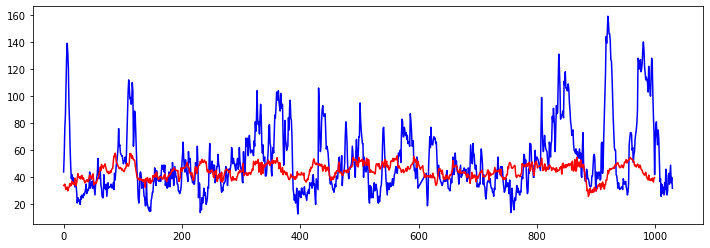

In [40]:
linear_regression_model_prediction = linear_regression.predict(X=pd.DataFrame(X))

fig = plt.figure(figsize=(12,4))
graph = fig.add_subplot(1,1,1)
graph.plot(y[:1000],color='blue')
graph.plot(linear_regression_model_prediction[:1000],color='red')

In [37]:
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  38.72862036039021
b value =  [ 0.96546469 -1.64859273  0.02131919  0.12090359]


In [38]:
residuals = y-prediction
residuals.describe()

count    2.139400e+04
mean    -6.681639e-15
std      3.483222e+01
min     -6.148467e+01
25%     -1.670196e+01
50%     -5.410866e+00
75%      9.671116e+00
max      8.587111e+02
Name: PM10, dtype: float64

R-squared값 비교

In [39]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.037963165207476335


In [41]:
from statsmodels.formula.api import ols

In [42]:
res = ols('PM10 ~ 기온 + 풍속 + 풍향 + 습도', data=w4_data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     211.0
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          7.13e-178
Time:                        05:26:07   Log-Likelihood:            -1.0632e+05
No. Observations:               21394   AIC:                         2.126e+05
Df Residuals:                   21389   BIC:                         2.127e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.7286      1.026     37.759      0.000      36.718      40.739
기온             0.9655      0.037     25.849      0.000       0.892       1.039
풍속            -1.6486      0.200     -8.225      0.000      -2.041      -1.256
풍향             0.0213      0.002      9.493      0.000       0.017       0.026
습도             0.1209      0.013      9.552      0.000       0.096       0.146
==============================================================================
Omnibus:                    33400.605   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35776928.367
Skew:                           9.728   Prob(JB):                         0.00
Kurtosis:                     202.390   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
import numpy as np
import pandas as pd
import statsmodels.api as sms


res_ = sms.OLS(w4_data['PM10'], w4_data[['기온','습도','풍향','풍속']])
result = res_.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   PM10   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              9677.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):                        0.00
Time:                        05:26:08   Log-Likelihood:                     -1.0701e+05
No. Observations:               21394   AIC:                                  2.140e+05
Df Residuals:                   21390   BIC:                                  2.141e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
기온             1.0809      0.038     28.117      0.000       1.006       1.156
습도             0.5070      0.008     65.787      0.000       0.492       0.522
풍향             0.0624      0.002     30.786      0.000       0.058       0.066
풍속             1.3718      0.190      7.227      0.000       1.000       1.744
==============================================================================
Omnibus:                    31121.634   Durbin-Watson:                   0.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25736741.238
Skew:                           8.472   Prob(JB):                         0.00
Kurtosis:                     172.070   Cond. No.                         188.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

어떤 변수가 PM10에 가장 큰 영향을 미치는가

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

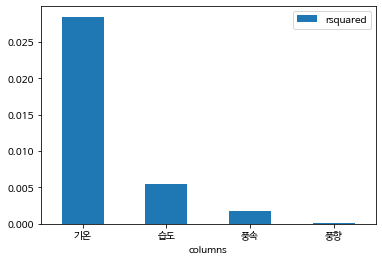

In [44]:
col = w4_data.columns
df = pd.DataFrame(columns=['columns','rsquared'])

for i in col:
    if (i == 'PM10'):
      pass
    else:
      model = ols( formula = f'PM10 ~ {i}' , data=w4_data).fit()
      rsquared = model.rsquared
      var = f'{i}'
      add_df = pd.DataFrame([[var,rsquared]], columns= ["columns", "rsquared"])
      df = pd.concat([df,add_df], ignore_index=True)
df.sort_values(by='rsquared',inplace=True, ascending=False, ignore_index=True)

df = df.set_index("columns")
df.plot(kind='bar',y=['rsquared'])
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

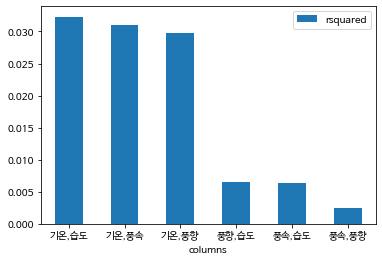

In [45]:
col = w4_data.columns
df = pd.DataFrame(columns=['columns','rsquared'])

for idx, i in enumerate(col):
  for j in col[idx+1:]:
    if (i == 'PM10' ) or ( j == 'PM10'):
      pass
    else:
      model = ols( formula = f'PM10 ~ {i} + {j}' , data=w4_data).fit()
      rsquared = model.rsquared
      var = f'{i},{j}'
      add_df = pd.DataFrame([[var,rsquared]], columns= ["columns", "rsquared"])
      df = pd.concat([df,add_df], ignore_index=True)
  df.sort_values(by='rsquared',inplace=True, ascending=False, ignore_index=True)

df = df.set_index("columns")
df.plot(kind='bar',y=['rsquared'])
plt.xticks(rotation=0)

# PM10과 PM2.5

In [91]:
wp_data = ww_data[['PM10','PM25']]
wp_data

,PM10,PM25
0,44.0,7.0
1,57.0,10.0
2,76.0,10.0
3,86.0,11.0
4,106.0,12.0
...,...,...
21787,33.0,16.0
21788,37.0,18.0
21789,37.0,17.0
21790,38.0,19.0


In [92]:
wp_data[['PM10','PM25']].isnull().sum()

PM10    324
PM25    233
dtype: int64

In [93]:
wp2_data = wp_data[['PM10','PM25']].dropna(axis=0)
wp2_data

,PM10,PM25
0,44.0,7.0
1,57.0,10.0
2,76.0,10.0
3,86.0,11.0
4,106.0,12.0
...,...,...
21787,33.0,16.0
21788,37.0,18.0
21789,37.0,17.0
21790,38.0,19.0


In [108]:
wp2_data.reset_index(inplace=True)

In [109]:
X2 = wp2_data['PM10']
X2

0         44.0
1         57.0
2         76.0
3         86.0
4        106.0
         ...  
21433     33.0
21434     37.0
21435     37.0
21436     38.0
21437     29.0
Name: PM10, Length: 21438, dtype: float64

In [110]:
y2 = wp2_data['PM25']
y2

0         7.0
1        10.0
2        10.0
3        11.0
4        12.0
         ... 
21433    16.0
21434    18.0
21435    17.0
21436    19.0
21437    16.0
Name: PM25, Length: 21438, dtype: float64

In [111]:
lin_reg_model2 = linear_regression.fit(X = pd.DataFrame(X2), y = y2)

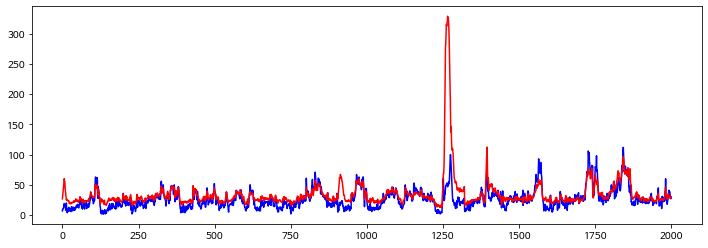

In [114]:
linear_regression_model_prediction2 = linear_regression.predict(X=pd.DataFrame(X2))

fig = plt.figure(figsize=(12,4))
graph = fig.add_subplot(1,1,1)
graph.plot(y2[:2000],color='blue')
graph.plot(linear_regression_model_prediction2[:2000],color='red')

In [115]:
ress = ols('PM25 ~ PM10', data=wp_data).fit()
ress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM25   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                 1.784e+04
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        05:47:14   Log-Likelihood:                -86404.
No. Observations:               21438   AIC:                         1.728e+05
Df Residuals:                   21436   BIC:                         1.728e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5799      0.158     73.352      0.000      11.270      11.889
PM10           0.3500      0.003    133.558      0.000       0.345       0.355
==============================================================================
Omnibus:                    21346.122   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7177686.588
Skew:                          -4.242   Prob(JB):                         0.00
Kurtosis:                      92.238   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
ress_ = sms.OLS(wp2_data['PM25'], wp2_data[['PM10']])
result2 = ress_.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   PM25   R-squared (uncentered):                   0.800
Model:                            OLS   Adj. R-squared (uncentered):              0.800
Method:                 Least Squares   F-statistic:                          8.561e+04
Date:                Mon, 18 Oct 2021   Prob (F-statistic):                        0.00
Time:                        05:47:15   Log-Likelihood:                         -88805.
No. Observations:               21438   AIC:                                  1.776e+05
Df Residuals:                   21437   BIC:                                  1.776e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PM10           0.5053      0.002    292.585      0.000       0.502       0.509
==============================================================================
Omnibus:                    38526.164   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         90744235.042
Skew:                         -12.877   Prob(JB):                         0.00
Kurtosis:                     320.688   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""